## Two neuron example

## a)
Yes. case 1 involves a linear classification with an offset, all on which are included in the input layers

## b)
No. A single neuron is not sufficient to produce a non-linear boundry 

In [42]:
import numpy as np
import matplotlib.pyplot as plt

p = int(2) #features
n = int(10000) #examples

## generate some features for training data
X = np.random.rand(n,p)-0.5

## generate labels of the feature vectors with known functions
## Note that sign()/2+0.5 maps output to be 0 or 1, 
## which is the range of the activation fuction
Y1 = np.sign(-2*X[:,[0]]+.2-X[:,[1]])/2+.5
Y2 = np.sign(5*X[:,[0]]**3-X[:,[1]])/2+.5
Y = np.hstack((Y1, Y2))


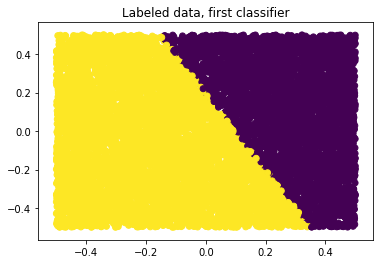

In [43]:
# Plot training data for first classification problem
plt.scatter(X[:,0], X[:,1], c=Y1.flatten())
plt.title('Labeled data, first classifier')
plt.show()

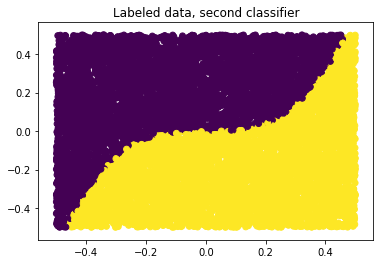

In [44]:
# Plot training data for second classification problem 
plt.scatter(X[:,0], X[:,1], c=Y2.flatten())
plt.title('Labeled data, second classifier')
plt.show()

In [58]:
## Train NN
Xb = np.hstack((np.ones((n,1)), X))
q = np.shape(Y)[1] #number of classification problems
M = 3 #number of hidden nodes

## initial weights
W = np.random.randn(p+1, q);

alpha = 0.1 #step size
L = 20 #number of epochs

def logsig(_x):
    return 1/(1+np.exp(-_x))
        
for epoch in range(L):
    ind = np.random.permutation(n)
    for i in ind:
        # Forward-propagate 
        Yhat = logsig(Xb[[i],:]@W) 
         # Backpropagate
        delta = (Yhat-Y[[i],:])*Yhat*(1-Yhat)
        Wnew = W - alpha*Xb[[i],:].T@delta
        W = Wnew
    print(epoch)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [59]:
## Final predicted labels (on training data)
H = logsig(np.hstack((np.ones((n,1)), Xb@W)))
Yhat = logsig(Xb@W)

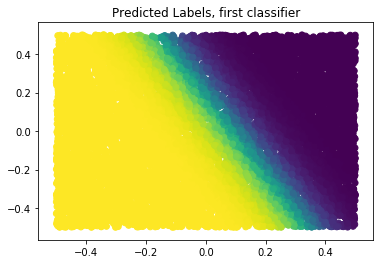

In [60]:
plt.scatter(X[:,0], X[:,1], c=Yhat[:,0])
plt.title('Predicted Labels, first classifier')
plt.show()

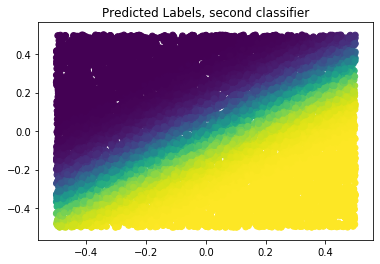

In [61]:
plt.scatter(X[:,0], X[:,1], c=Yhat[:,1])
plt.title('Predicted Labels, second classifier')
plt.show()

In [62]:
err_c1 = np.sum(abs(np.round(Yhat[:,0])-Y[:,0]))
print('Errors, first classifier:', err_c1)

err_c2 = np.sum(abs(np.round(Yhat[:,1])-Y[:,1]))
print('Errors, second classifier:', err_c2)

Errors, first classifier: 25.0
Errors, second classifier: 760.0


## c)

In [57]:
print("Errors, first classifier: ", 221.0)
print("Errors, second classifier: ", 759.0)

Errors, first classifier:  221.0
Errors, second classifier:  759.0


## d)

In [63]:
print("Errors, first classifier: ", 25.0)
print("Errors, second classifier: ", 760.0)

Errors, first classifier:  25.0
Errors, second classifier:  760.0


## e)
With a small training set, both linear and non-linear classification cases performed poorly
With a large training set, the linear case can perform well, but since the given neural network cannot perform nonlinear classification, case 2 still performs poorly